In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from img_manager import load_data

In [2]:
import cv2
import numpy as np
import os

In [ ]:
(x1, y_1), (x_2, y_2) = load_data()

Uploaded 1000 photos
Uploaded 2000 photos
Uploaded 3000 photos
Uploaded 4000 photos
Uploaded 5000 photos
Uploaded 6000 photos
Uploaded 7000 photos
Uploaded 8000 photos
Uploaded 9000 photos
Uploaded 10000 photos


In [ ]:
print(x1.shape)

In [ ]:
x_train = []
y_train = []
main_path = 'img/train/'
size = (26,26)
is_human = False
for dir in os.listdir(main_path):
    i = 0
    if dir[0] == 'T':
        is_human = True
    elif dir[0] == 'F':
        is_human = False
    path = main_path + dir + '/'
    print(dir)

    for file in os.listdir(path):
        img = cv2.imread(path+file)
        img = cv2.resize(img, size)
        img = img.astype(dtype="float32") / 255.0
        x_train.append(img)
        y_train.append(is_human)
        i+=1
        # print(i)
        if i == 300:
            break
print("koniec")


In [15]:
x_train = tf.constant(x_train)
y_train = tf.constant(y_train)
print(x_train.shape)
print(np.array(y_train).shape)
print(type(x_train))

Epoch 1/5
331/331 [==============================] - 17s 50ms/step - loss: 1.1185 - accuracy: 0.9552
Epoch 2/5
331/331 [==============================] - 17s 50ms/step - loss: 0.3280 - accuracy: 0.9699
Epoch 3/5
331/331 [==============================] - 18s 55ms/step - loss: 0.2502 - accuracy: 0.9759
Epoch 4/5
331/331 [==============================] - 18s 55ms/step - loss: 0.2348 - accuracy: 0.9763
Epoch 5/5
331/331 [==============================] - 17s 52ms/step - loss: 0.2269 - accuracy: 0.9778


In [16]:
model = keras.models.Sequential(
    [
        keras.Input(shape=(200,200,3)),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPool2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPool2D(),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        # layers.Dense(1, activation='sigmoid')
        layers.Dense(1, activation='sigmoid')
    ]
)

7/7 [==============================] - 0s 11ms/step - loss: 0.3650 - accuracy: 0.9292


[0.3650076389312744, 0.9292452931404114]

In [17]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        1792      
                                                                 
 batch_normalization_6 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 batch_normalization_7 (Bat  (None, 10, 10, 128)       512       
 chNormalization)                                                
                                                      

In [32]:
model_fit = model.fit(x_train, y_train, epochs = 20)

2/2 [==============================] - 0s 16ms/step - loss: 3.4174 - accuracy: 0.5000


[3.417419910430908, 0.5]

In [22]:
model.evaluate()

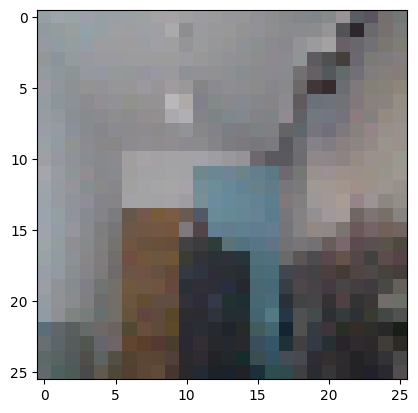

1/1 [==============================] - 0s 21ms/step
Human


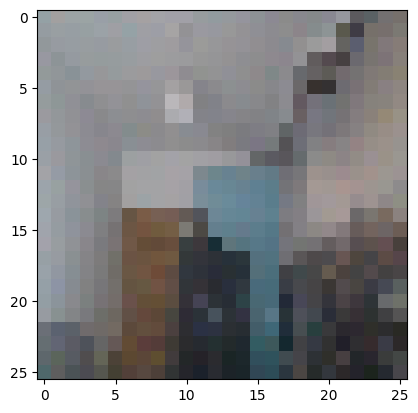

1/1 [==============================] - 0s 28ms/step
Human


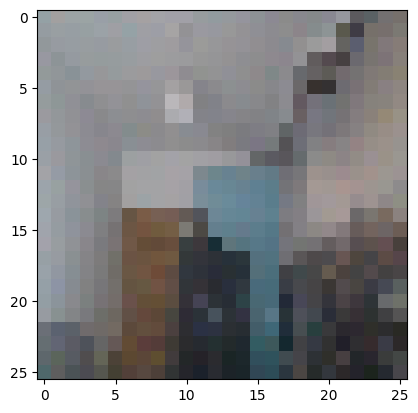

1/1 [==============================] - 0s 35ms/step
Human


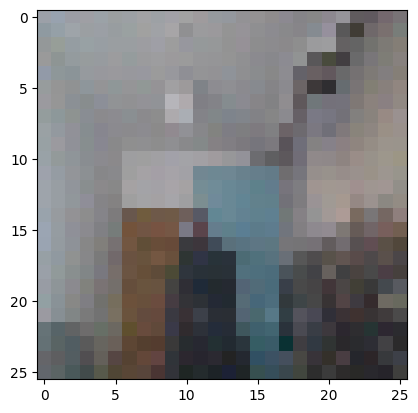

1/1 [==============================] - 0s 38ms/step
Human


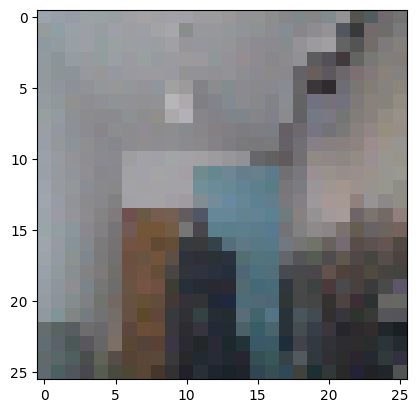

1/1 [==============================] - 0s 34ms/step
Human


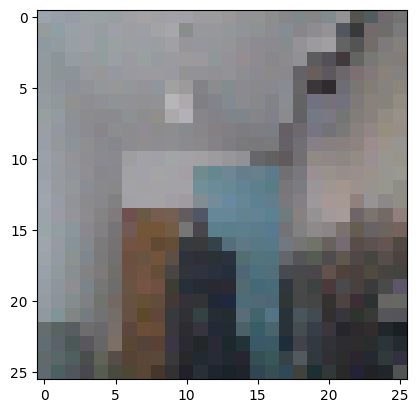

1/1 [==============================] - 0s 29ms/step
Human


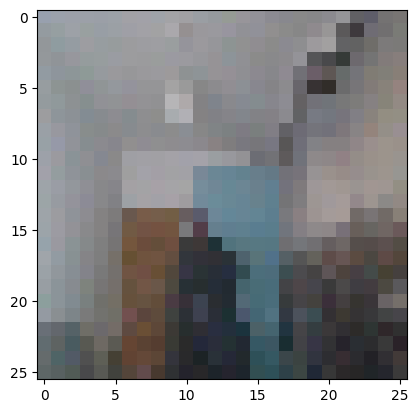

1/1 [==============================] - 0s 30ms/step
Human


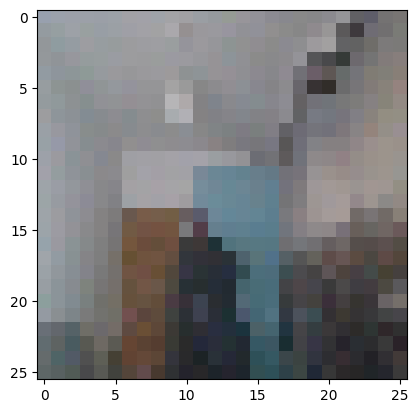

1/1 [==============================] - 0s 25ms/step
Human


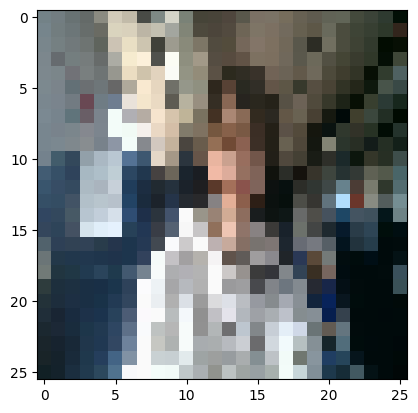

1/1 [==============================] - 0s 24ms/step
Human


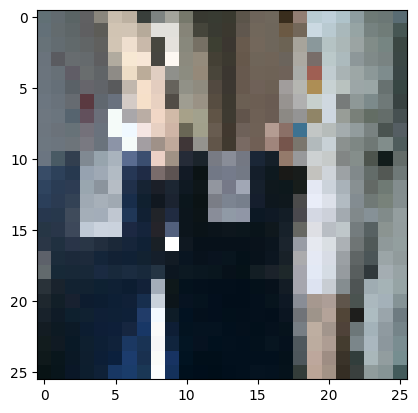

1/1 [==============================] - 0s 33ms/step
Human


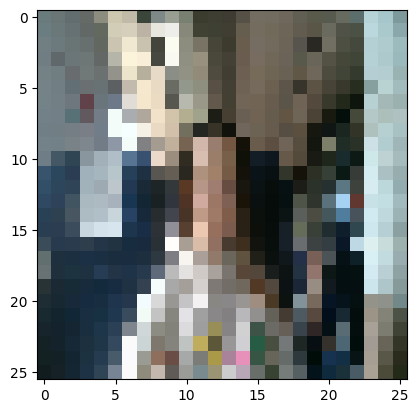

1/1 [==============================] - 0s 30ms/step
Human


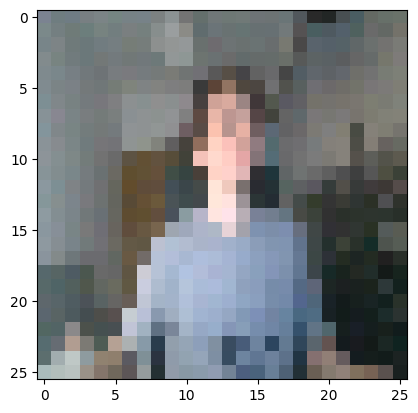

1/1 [==============================] - 0s 31ms/step
Human


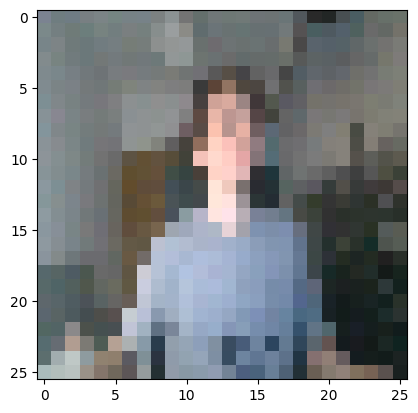

1/1 [==============================] - 0s 27ms/step
Human


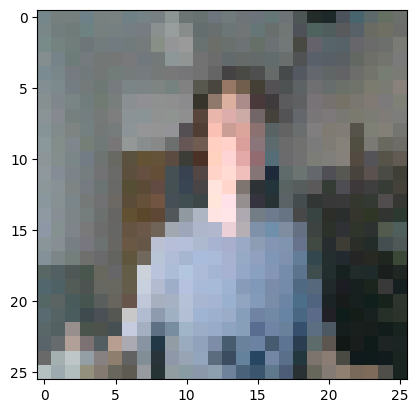

1/1 [==============================] - 0s 28ms/step
Human


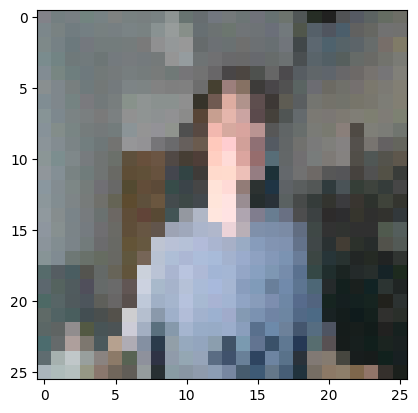

1/1 [==============================] - 0s 27ms/step
Human


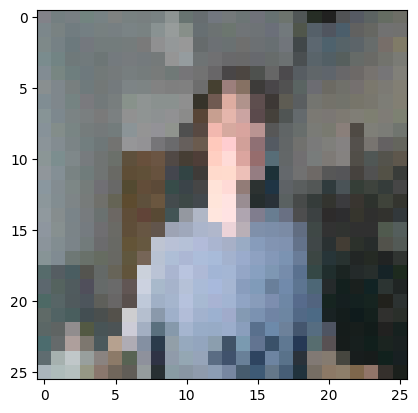

1/1 [==============================] - 0s 28ms/step
Human


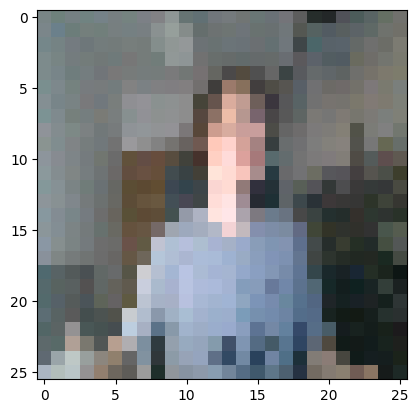

1/1 [==============================] - 0s 25ms/step
Human


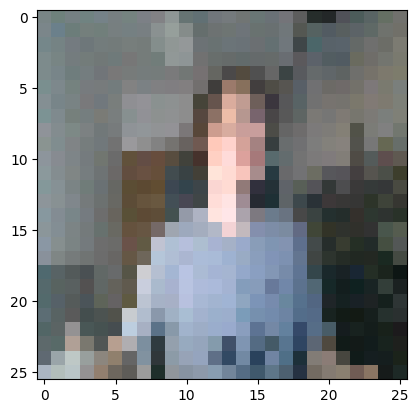

1/1 [==============================] - 0s 31ms/step
Human


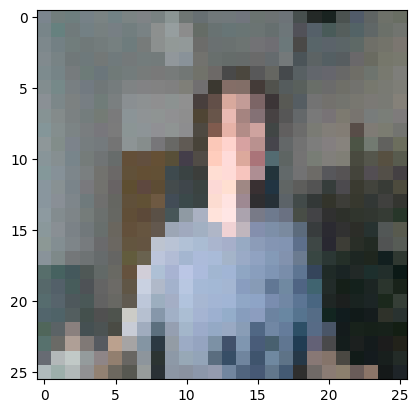

1/1 [==============================] - 0s 27ms/step
Human


In [25]:
model.summary()

In [7]:
model.save('model/face_reco.h5')

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt

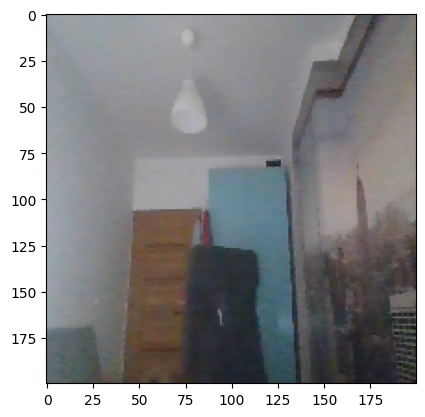

1/1 [==============================] - 0s 45ms/step
Not Human


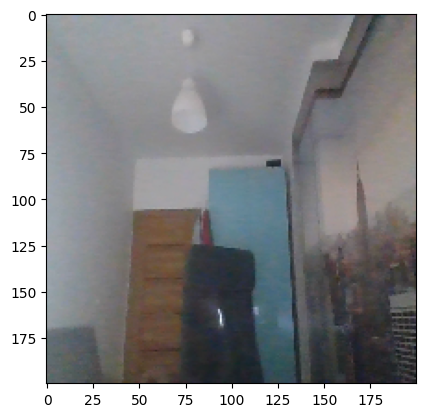

1/1 [==============================] - 0s 86ms/step
Not Human


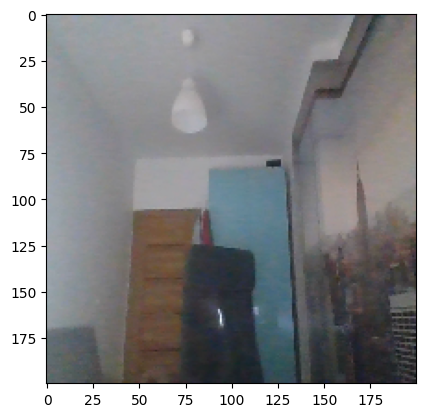

1/1 [==============================] - 0s 55ms/step
Not Human


In [18]:
DIR = 'img/test/'

i=0
for file in os.listdir(DIR):
        path = DIR+file
        img = image.load_img(path, target_size=(200,200))
        plt.imshow(img)
        plt.show()

        X = image.img_to_array(img)
        X = np.expand_dims(X, axis = 0)
        images = np.vstack([X])
        label = model.predict(images)

        if label == 0:
                print("Not Human")
        elif label == 1:
                print("Human")
        
        i+=1
        if i == 3:
                break